In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [39]:
iris= pd.read_csv(r"iris-data.csv")

In [3]:
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
null_cols = iris.isnull().sum()
null_cols
null_cols[null_cols > 0]

petal_width_cm    5
dtype: int64

In [8]:
null_cols

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

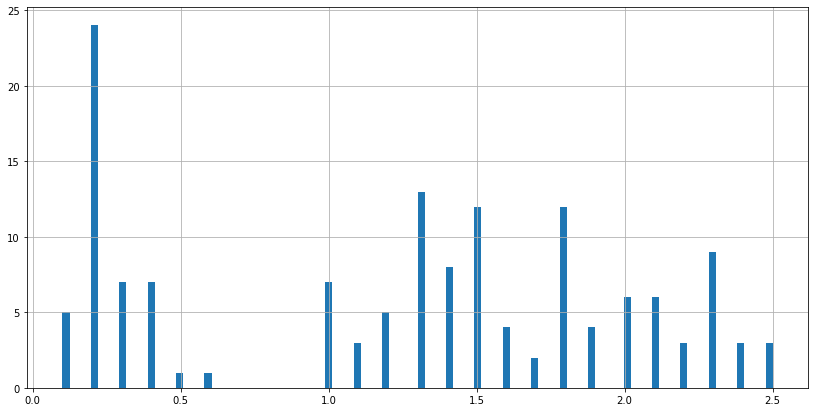

In [9]:
plt.figure(figsize=(14,7))
iris['petal_width_cm'].hist(bins=100) 

In [10]:
iris['petal_width_cm'].median()

1.3

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(iris, test_size=0.2, random_state=123)

In [14]:
train_set.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
130,7.4,2.8,6.1,1.9,Iris-virginica
119,6.0,2.2,5.0,1.5,Iris-virginica
29,4.7,3.2,1.6,0.2,Iris-setosa
0,5.1,3.5,1.4,0.2,Iris-setosa
62,6.0,2.2,4.0,1.0,Iris-versicolor


In [15]:
train_set.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,120.000000,120.000000,120.000000,116.000000
mean,5.609117,3.041667,3.820833,1.262931
std,1.405376,0.439936,1.728841,0.732658
min,0.055000,2.000000,1.000000,0.100000
25%,5.075000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.350000,1.350000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 130 to 109
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  120 non-null    float64
 1   sepal_width_cm   120 non-null    float64
 2   petal_length_cm  120 non-null    float64
 3   petal_width_cm   116 non-null    float64
 4   class            120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


In [22]:
null_cols = train_set.isnull().sum()
null_cols
null_cols[null_cols > 0]

petal_width_cm    4
dtype: int64

In [18]:
train_labels = iris["class"]
train_set.drop("class", axis = 1)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
130,7.4,2.8,6.1,1.9
119,6.0,2.2,5.0,1.5
29,4.7,3.2,1.6,0.2
0,5.1,3.5,1.4,0.2
62,6.0,2.2,4.0,1.0
...,...,...,...,...
17,5.1,3.5,1.4,0.3
98,5.1,2.5,3.0,1.1
66,5.6,3.0,4.5,1.5
126,6.2,2.8,4.8,1.8


In [19]:
from sklearn.impute import SimpleImputer

# Function for the value replacements

?SimpleImputer

In [20]:
# I'll show how we'd do it for all numerical features
train_num = train_set.select_dtypes(include=["float64"])

# we 'initiate' the transformer
imputer = SimpleImputer(strategy="mean")

# we use its 'fit_transform' method on the selected features of the training set
# 'fit' in this case means looking for the mean in each selected feature
# 'transform' means actually replacing NANs with the mean
X = imputer.fit_transform(train_num)
# transform output back to dataframe 
# (not needed for modelling, but it might help if you have to keep exploring)
train_num = pd.DataFrame(X,
                         columns=train_num.columns,
                         index=train_num.index)
train_num.head(20)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
130,7.4,2.8,6.1,1.9
119,6.0,2.2,5.0,1.5
29,4.7,3.2,1.6,0.2
0,5.1,3.5,1.4,0.2
62,6.0,2.2,4.0,1.0
93,5.0,2.3,3.3,1.0
131,7.9,3.8,6.4,2.0
5,5.4,3.9,1.7,0.4
16,5.4,3.9,1.3,0.4
82,5.8,2.7,3.9,1.2


In [23]:
train_num["petal_width_cm"].mean()

1.2629310344827585

In [24]:
# select only numerical features
test_num = test_set.select_dtypes(include=["float64"])

# the imputer's already created and fitted. we just need to use the .transform() method 
# to fill Nan's with the mean
test_X = imputer.transform(test_num)
# transform output back to dataframe 
# (not needed for modelling, but it might help if you have to keep exploring)
test_num = pd.DataFrame(test_X,
                         columns=test_num.columns,
                         index=test_num.index)

test_num.head(20)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
72,6.3,2.5,4.9,1.500000
112,6.8,3.0,5.5,2.100000
132,6.4,2.8,5.6,2.200000
88,5.6,3.0,4.1,1.300000
37,4.9,3.1,1.5,0.100000
138,6.0,3.0,4.8,1.800000
87,6.3,2.3,4.4,1.300000
42,4.4,3.2,1.3,0.200000
8,4.4,2.9,1.4,1.262931
90,5.5,2.6,4.4,1.200000


In [25]:
train_num['petal_width_cm'].mean()

1.2629310344827585

In [26]:
test_num['petal_width_cm'].mean()

1.1354310344827587

In [27]:
iris.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8335824340>,
      dtype=object)

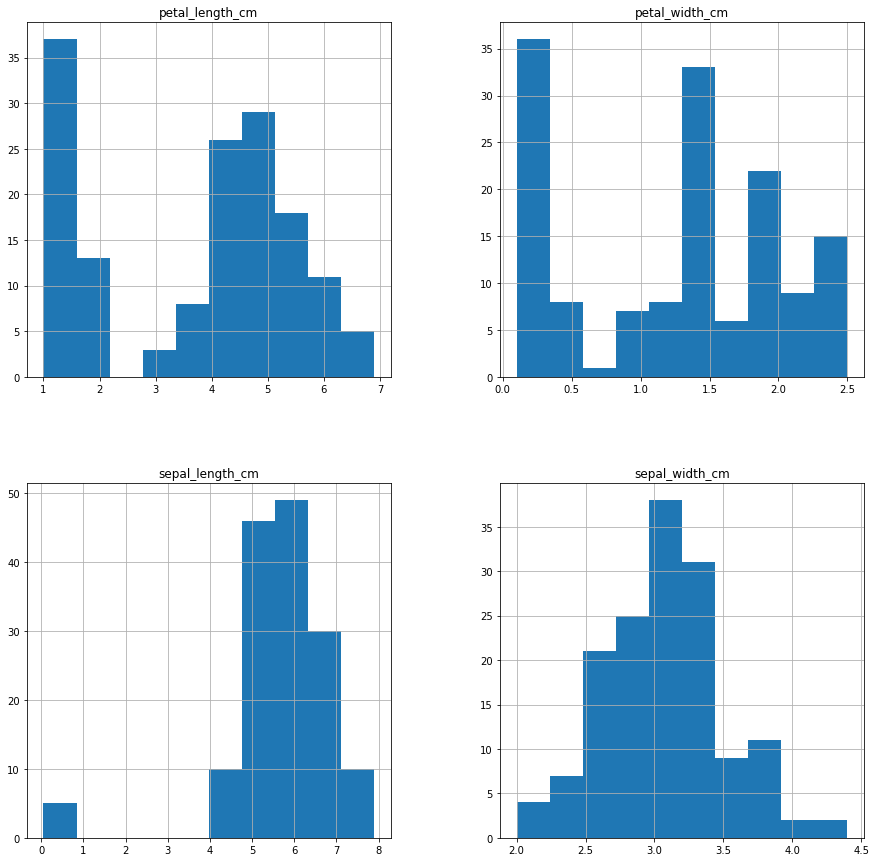

In [28]:
iris.hist(figsize = (15,15))

In [29]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [40]:
iris = iris.drop("class", axis = 1)

In [31]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [42]:
# select only numerical features
iris_clean = iris.select_dtypes(include=["float64"])

# the imputer's already created and fitted. we just need to use the .transform() method 
# to fill Nan's with the mean
test_X = imputer.transform(iris_clean)
# transform output back to dataframe 
# (not needed for modelling, but it might help if you have to keep exploring)
iris_clean = pd.DataFrame(test_X,
                         columns=iris.columns,
                         index=iris.index)

iris_clean.head(20)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.200000
1,4.9,3.0,1.4,0.200000
2,4.7,3.2,1.3,0.200000
3,4.6,3.1,1.5,0.200000
4,5.0,3.6,1.4,0.200000
5,5.4,3.9,1.7,0.400000
6,4.6,3.4,1.4,0.300000
7,5.0,3.4,1.5,1.262931
8,4.4,2.9,1.4,1.262931
9,4.9,3.1,1.5,1.262931


In [43]:
iris_clean.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
dtype: int64

In [44]:
iris_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8335904250>,
      dtype=object)

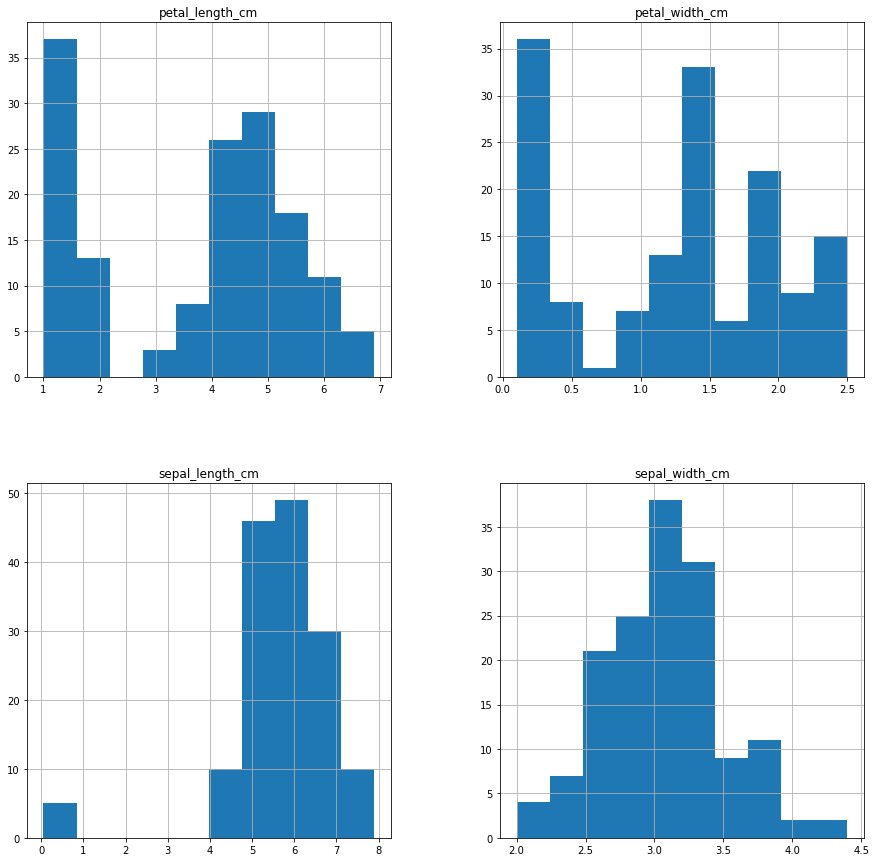

In [45]:
iris_clean.hist(figsize = (15,15))

In [47]:
iris_clean.to_csv('iris_clean.csv',index=False)